# Analyzing SpongeBob SquarePants

By: Varun Natu, Kevin Parrot, Jacob Rosen, Manoj V 

### Introduction

Spongebob is a popular, long-running children's cartoon. But if you look at a [graph](https://www.ratingraph.com/tv_shows/spongebob_squarepants-88463/) of the ratings for the TV show, you'll notice that, at least according to the popular reviews, it has never been as good as it was in seasons 1 to 3. The problem we will try to tackle is to see if we can find what changed and make a mathematical argument for its effect on the shows reception.

### Webscraping and Data Aquisition

We used web scraping to get the dialogue and API requests to get information like IMDB rating and episode writers.  

We only scraped up through season 11 because season 12 was incomplete and a lot of our analysis focuses on season. From seasons 1 to 11 there were several episodes that could not be scraped becuase of formatting issues on the [wiki](https://spongebob.fandom.com/wiki/List_of_transcripts).

### EDA

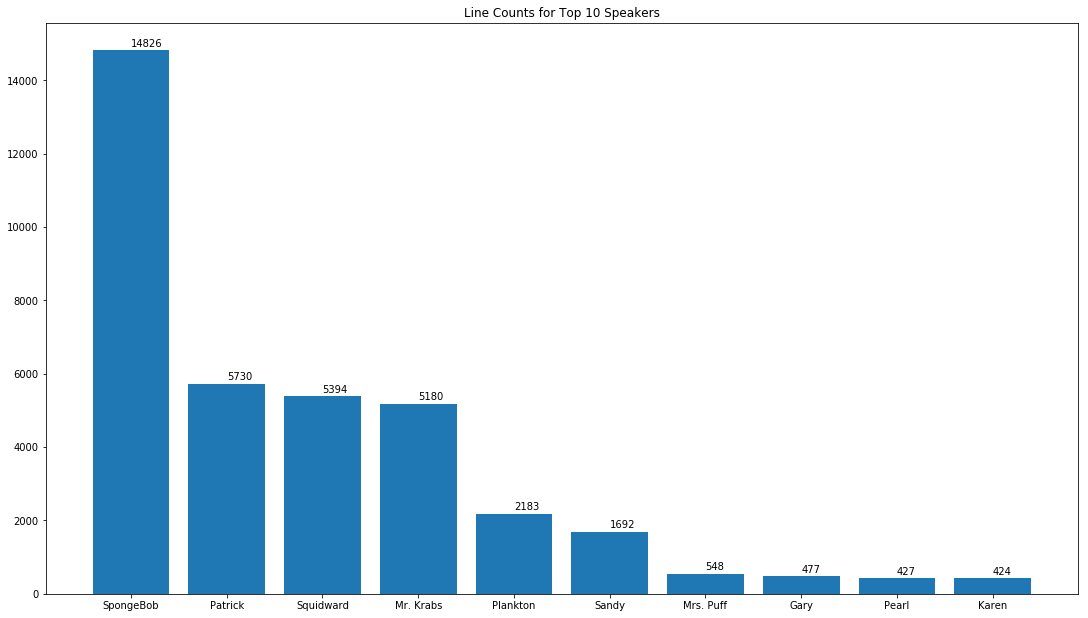

In [4]:
import json
with open("transcripts.json", "r") as read_file:
    transcripts = json.load(read_file)

from collections import Counter

spkcount = Counter()
reccount = Counter()
for ep in transcripts:
    for line in transcripts[ep]:
        spkcount[line['spk']]+=1
        reccount[line['rec']]+=1

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
top10spk = spkcount.most_common()[:10]
plt.bar(*zip(*top10spk))
for i,pair in enumerate(top10spk):
    plt.text(x=i,y=pair[1]+100, s=str(pair[1]))
plt.title("Line Counts for Top 10 Speakers")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

Using the generated transcripts the number of lines spoken by each character is counted and the data for the top 10 characters with most lines are plotted in the above bar-graph.
The most lines spoken are by Spongebob, which makes sense as he is the main character of the show, he has nearly 2.5 times more lines than the next character, implying that most of the plot closely revolve around him.
The 2nd, 3rd and 4th characters with most lines are close to each other, suggesting that there isn't a second central character but instead several different tertiary characters. 
5th character onwards the number of lines drop exponentially, which makes sense as most of these characters don't have a recurring occurrence in each episode.

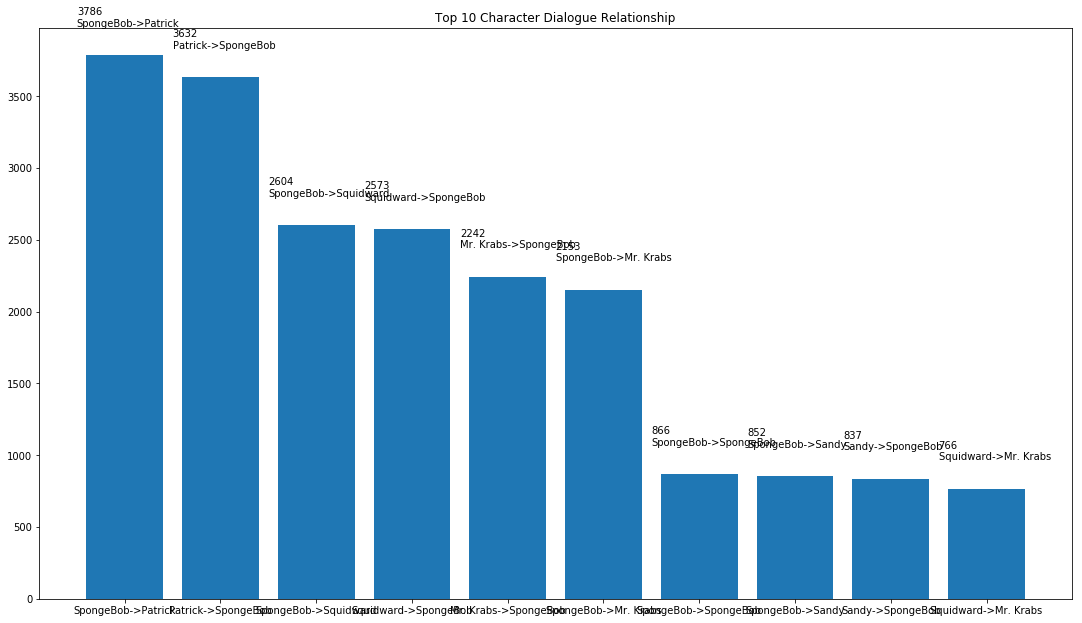

In [3]:
rship = Counter()
for ep in transcripts:
    for line in transcripts[ep]:
        s = line['spk']
        r = line['rec']
        ship = s+'->'+r
        rship[ship] += 1
# rship.most_common()[:10]

top10ship = rship.most_common()[:10]
plt.bar(*zip(*top10ship))
for i,pair in enumerate(top10ship):
#     print(pair)
#     lab = str(pair[1])
#     lab = lab.replace('>','>\n')
# #     print(lab)
    plt.text(x=i-.5,y=pair[1]+200, s=str(pair[1])+"\n"+pair[0])
plt.title("Top 10 Character Dialogue Relationship")
# from matplotlib.axes import Axes
# # for i,pair in enumerate(top10ship):
# Axes.bar(x,y)
# Axes.set_xticks(x)
# Axes.set_xticklabels(top10ship[0])

#     Axes.set_xticklabels(self=, labels=pair[0])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

Based on the transcript if a character has a dialogue right after another's characters dialogue, the two are labeled as receiver and speaker respectively.
For example, if Patrick's dialogues follow right after SpongeBob, SpongeBob is designated as speaker and Patrick as a receiver. And based on this assumption the number of character interactions are calculated.
Though this assumption is not perfect, as it doesn't mark an end of a particular conversation and the start of another, based on the results (plotted above) which match well viewers experience, we can see that most 
conversations are between SpongeBob and other characters, with the top conversation being between Spongebob and Patrick, Squidward and Mr.Krabbs respectively. This correlates well with the number of lines spoken bar-graph as 
the number of lines spoken by each character is directly proportional to the number of conversations they have with SpongeBob. This again highlights that SpongeBob is central to most conversations and character interactions without him are rare. 

### Word Vectors

Word vectors are a way to represent words as a list of numbers and thereby encode meaning in a way a computer can work with. We use the word2vec model in this project. This model works by, based on the corpus passed to it, assigning weights (in our case 32 weights) as a vector for a specific word. Although there are many uses for word vectors, we use them here simply to get a better understanding of the dialogue by looking at the top 10 words most similar to a given test word.   
  
The example for "krabby" is shown below. Although some words in those list make sense ("secret", "formula"), other words seem weird, like "5000". It turns out that in one episode someone orders 5000 krabby patties; however these words never experience such proximity again. This shows how our lack of data can heavily influence the results of our analysis, and will be a recurring theme throughout this project.  

The code below creates the word2vec model from the transcripts. It takes a while to finish so the model was saved and included in the project submission zip file. 


In [ ]:
# # code to create word vector
# import gensim
# from gensim import corpora,models,similarities
# from gensim.models import Word2Vec
# import spacy
# import re
# nlp = spacy.load("en")
# from spacy.lang.en.stop_words import STOP_WORDS
# from spacy.lang.en import English
# stop_words = spacy.lang.en.stop_words.STOP_WORDS
# parser = English()
# import string
# punctuations = string.punctuation
# def spacy_tokenizer(sentence):
#     # Creating our token object, which is used to create documents with linguistic annotations.
#     mytokens = parser(sentence)

#     # Lemmatizing each token and converting each token into lowercase
#     mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

#     # Removing stop words
#     mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

#     # return preprocessed list of tokens
#     return mytokens
# import json
# with open("transcripts.json", "r") as read_file:
#     transcripts = json.load(read_file)
# alldial = []
# for ep in transcripts:
#     for line in transcripts[ep]:
#         dlist = line['dial']
#         seperator = ', '
#         dstring = seperator.join(dlist)
#         tokenizedlist = spacy_tokenizer(dstring)
# #         tokenizedstring = seperator.join(tokenizedlist)
#         alldial.append(tokenizedlist)
# fullmodel = gensim.models.Word2Vec(alldial, min_count=1, size=32)

In [6]:
wordvecmodel=Word2Vec.load("word2vec.fullmodel")
wordvecmodel.most_similar('krabby')

C:\Users\Jacob Rosen\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


[('frozen', 0.9438496828079224),
 ('secret', 0.9393989443778992),
 ('formula', 0.936418354511261),
 ('steal', 0.9220641851425171),
 ('hideout', 0.9191142320632935),
 ('5,000', 0.9182615280151367),
 ('formuler', 0.9152272939682007),
 ('hanker', 0.912421703338623),
 ('disclose', 0.9091897010803223),
 ('eat', 0.9080131649971008)]

In [8]:
wordvecmodel.most_similar('squidward')


C:\Users\Jacob Rosen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('worry', 0.9687833189964294),
 ('idea', 0.9635894894599915),
 ('squarepants', 0.9627671241760254),
 ('tentacles', 0.9590011835098267),
 ('sorry', 0.9582744836807251),
 ('great', 0.9574989676475525),
 ('late', 0.9523110389709473),
 ('rrarrg', 0.9511217474937439),
 ('bye', 0.948992908000946),
 ('ruse', 0.9482672214508057)]

In [18]:
wordvecmodel.most_similar('formula')


C:\Users\Jacob Rosen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('secret', 0.9944764971733093),
 ('steal', 0.9764915704727173),
 ('formuler', 0.9727444648742676),
 ('frozen', 0.9675302505493164),
 ('hideout', 0.9641355276107788),
 ('patty', 0.9546574354171753),
 ('recipe', 0.9504899382591248),
 ('ingredient', 0.9490015506744385),
 ('fries', 0.9470958709716797),
 ('krabby', 0.936418354511261)]

### Sentiment Analysis

Sentiment Analysis is the contextual analysis of text that is used to determine the subjectivity of what is written. In our case we were analyzing the lines spoken by each charachter and giving them a sentiment score for each line of dialouge they said. In order to do this we utilized Vader, a sentiment analysis lexicon that is contained within python's NLTK module. 

In [2]:
import json 
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

with open('./transcripts.json','r') as file:
    transcripts = json.load(file)
#downloads the lexicon used for the Sentment Intensity Analyzer
#nltk.download('vader_lexicon') 
sid=SentimentIntensityAnalyzer()

The above cell imports the neccessary modules and pulls the transcript dictionaries from a json file. It also initializes an instance of the Sentiment Intensity Analyzer. In the cell below we use a for loop to piece together the tokenized words of each line. The sentence is then passed to the SID to give the sentence a sentiment score, which is made up of positive, negative, neutral and compound components. We utilized the compound component since it represented the overall score of the line.

In [4]:
SDict={}
for episode in transcripts:
    line_list=[]
    for line in transcripts[episode]:
        speaker=line['spk']
        reciever=line['rec']
        line_num=line['time']
        sentence=''
        line_dict={}
        for i,word in enumerate(line['dial']): 
            if '\'' in word:
                sentence = sentence+word
            else:
                sentence=sentence+' '+word
        score = sid.polarity_scores(sentence)
        line_dict['spk']=speaker
        line_dict['rec']=reciever
        line_dict['time']=line_num
        line_dict['line']=sentence
        line_dict['score']=score
        line_list.append(line_dict)
    SDict[episode]=line_list
#Example
#SDict['1a']

In the next part of this section, we'll show how the data was manipulated to be used for other metrics and visualizations. In order to limit our scope to meaningful character data, we used a list of important charachters to isolate there interactions with eachother.

In [ ]:
import_chars={'SpongeBob':0, 'Patrick':1,'Squidward':2,'Mr. Krabs':3,'Sandy':4,'Plankton':5}#,'Pearl':6,'Mrs. Puff':7,'Karen':8}

The cell below creates a dictionary that contains the average sentiment and line count for the important characters on a by-episode basis. This data will be important later when training our models.

In [ ]:
solo_sentiment_dict={}
for episode in SDict:
    line_total=0
    solo_sentiment_dict[episode]={}
    for line in SDict[episode]:
        if line['spk'] in import_chars and line['rec'] in import_chars:
            if line['spk'] not in solo_sentiment_dict[episode]:
                solo_sentiment_dict[episode][line['spk']]={'count':1,'score':line['score']['compound']}
                line_total+=1
            else:
                solo_sentiment_dict[episode][line['spk']]['count']+=1
                solo_sentiment_dict[episode][line['spk']]['score']+=line['score']['compound']
                line_total+=1
    
    for character in solo_sentiment_dict[episode]:
        solo_sentiment_dict[episode][character]['avg']=solo_sentiment_dict[episode][character]['score']/solo_sentiment_dict[episode][character]['count']
        solo_sentiment_dict[episode][character]['line %']=solo_sentiment_dict[episode][character]['count']/float(line_total)
#solo_sentiment_dict

In the next cell, a dictionary is created that counts the directional character interactions throughout the entire series. The following cell turns that dictionary into a list of the directional interactions between important characters.

In [ ]:
series_S2S_dict={}
for episode in SDict:
    for line in SDict[episode]:
        dial_direct=(line['spk'],line['rec'])
        #print(dial_direct)
        if dial_direct not in series_S2S_dict:
            series_S2S_dict[dial_direct]={'count':1,'score':line['score']['compound']}
        else:
            series_S2S_dict[dial_direct]['count']+=1
            series_S2S_dict[dial_direct]['score']+=line['score']['compound']
for interaction in series_S2S_dict:
    series_S2S_dict[interaction]['avg']=series_S2S_dict[interaction]['score']/series_S2S_dict[interaction]['count']
#series_S2S_dict

In [ ]:
char_int_list=[]
for interaction in series_S2S_dict:
    spk2rec=interaction
    count=series_S2S_dict[interaction]['count']
    avg=series_S2S_dict[interaction]['avg']
    char_int_list.append([spk2rec,count,avg])
char_int_list = sorted(char_int_list, key=lambda x: x[1], reverse=True)
import_char_ints=[]
for interaction in char_int_list:
    speak=interaction[0][0]
    rec=interaction[0][1]
    if speak in import_chars and rec in import_chars:
        import_char_ints.append(interaction)
#import_char_ints

In order to create heatmaps for directional character interactions and directional sentiment scores, the interaction data must be transformed into a matrix. This is done using the values of the important character dictionary.

In [ ]:
char_scores=np.zeros((len(import_chars),len(import_chars)))
char_ints=np.zeros((len(import_chars),len(import_chars)))
for interaction in import_char_ints:
    x=import_chars[interaction[0][0]]
    y=import_chars[interaction[0][1]]
    char_scores[x][y]=interaction[2]
    char_ints[x][y]=interaction[1]

In [ ]:
#print(char_ints)
#print(char_scores)

#### sentiment heat map, directional sentiment

<img src='heatmap char avg.png'>

The sentiment heatmaps show the average sentiments of all the conversations (averaged over all the seasons) the red spectrum 
is indicative of a overall negative sentiment while the blue tones represent a positive sentiment. 
Neutral conversations are in White. This again capcuters the overall attitude of characters in the show, with spongebob, who is mostly a 
cheerful and positive character having a positive dialouge with mostly everyone, meanwhile Squidward who is portryed on the show as a 
grumpy and angry character has a mostly negative conversations with most characters. 


#### interaction heat map

<img src='heatmap char ints.png'>

This heat map represents bar graph 2 in a more visually descriptive way. Here again, we see that most of the conversations are between SpongeBob and Patrik followed by SpongeBobs conversations with Squidward and Mr.Krabs, we can again see that conversations not involving SpongeBob are near zero.

In [ ]:
import json
import numpy as np
from pprint import pprint
# with open('./sentiment_dict.json','r') as file:
#     SDict=json.load(file)

import_chars={'SpongeBob':0, 'Patrick':1,'Squidward':2,'Mr. Krabs':3,'Sandy':4,'Plankton':5}
Sdirdict = {}
for ep in SDict.keys():
    Sdirdict[ep] = {}
    pq = [0]
    qp = [0]
    
    for line in SDict[ep]:
        if line['spk'] in 'SpongeBob' and line['rec'] in 'Squidward':
            pq.append(line['score']['compound'])
        elif line['spk'] in 'Squidward' and line['rec'] in 'SpongeBob':
            qp.append(line['score']['compound'])
    Sdirdict[ep]['SpSq'] = pq
    Sdirdict[ep]['SqSp'] = qp
eps = []
spsq = []
sqsp = []
for ep in Sdirdict.keys():
    if len(Sdirdict[ep]['SpSq']) > 1:
        eps.append(ep)
        spsq.append((sum(Sdirdict[ep]['SpSq']))/len(Sdirdict[ep]['SpSq']))
        sqsp.append((sum(Sdirdict[ep]['SqSp']))/len(Sdirdict[ep]['SqSp']))
for n in eps
spsqdf = pd.DataFrame(list(zip(eps, spsq,sqsp)), 
               columns =['Ep', 'SPSQ','SQSP'])
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot('Ep','SPSQ',data=spsqdf, color='gold')
plt.plot('Ep','SQSP',data=spsqdf, color='blue', alpha=.3)
plt.legend()
plt.title('Spongebob-Squidward Bidirectional Sentiment Over Show')
plt.xlabel('episode')
plt.ylabel('sentiment')plt.axvline(x='61a', color='red')
plt.axvline(x='127a', color='red')
plt.axvline(x='205a', color='red')
plt.axvline(x='241b', color='red')

<img src='spsqsent.png'>

The goal of this graph was to see if there were any easily spotted trends or outliers. We chose these two characters because it can be [argued](https://youtu.be/cYu7Y52iiYI) that they are the true main characters of the show; or at the very least they are frequently shown and very obvious foils.  

Unfortunately the graph shows nothing truly interesting, other than that Squidward is more negative and Spongebob is more positive.

In this section we use R to make several regression models. The goal is to predict rating from various features we have engineered.    

The features can be broken up by group. The word count features are name abbreviations and represent the proportion of total words spoken in an episode by the character. There are 6: Sp (*spongebob*), Pa (*patrick*), Sq (*squidward*), Sa (*sandy*), Pl (*plankton*), K (*mr. krabs*)

The sentiment features have the same name abbreviations but have "sent" appended to them. They represent the composite sentiment of the character in an episode. There are 6: Spsent (*spongebob*), Pasent (*patrick*), Sqsent (*squidward*), Sasent (*sandy*), Plsent (*plankton*), Ksent (*mr. krabs*)    

The "C" features are the principal components of the one-hot encoded matrix of writers. Put another way, we performed PCA on the matrix of ones and zeros that show what writer(s) wrote what episodes. The number next to the "C" represents which principal component that feature is. We went with 5, and those components represent about 39% of the variation.  


The first model is a linear regression model using all features and trained on every episode. This was more to get a feel for the data, rather than prediction.  
Below is the R code.

In [ ]:
# modeldata_pca <- read.csv("modeldata_pca.csv")
# modeldata_pca <- modeldata_pca[ , -which(names(modeldata_pca) %in% c("X"))]
# fullmod_lin <- lm(rating ~ ., data=modeldata_pca)
# summary(fullmod_lin)

<img src='Rlinmod_out.PNG'>

As you can see the model is fairly poor at capturing the variance in the data. What is most shocking however is the fact that only the PCA components are significant coefficients. But again, it was unlikely from the start that this relationship was linear, so we will try polynomial regression next and actually use it for prediction.

We found that a degree of 3 allowed for a mix of using more variables (any more than around 10-12 variables and R runs out of memory) but still allowing for flexibility. 

In [ ]:
# errorlist <- list()
# train_index <- sample(1:nrow(modeldata_pca), 0.7 * nrow(modeldata_pca))
# test_index <- setdiff(1:nrow(modeldata_pca), train_index)

# x_train <- modeldata_pca[train_index, c(2:19)]
# y_train <- modeldata_pca[train_index, "rating"]

# x_test <- modeldata_pca[test_index, c(2:19)]
# y_test <- modeldata_pca[test_index, "rating"]
# fullmodel_poly <- lm(rating~ polym(Sp,Sq,SPsent,Sqsent,C1,C2,C3,C4,C5, degree=3, raw=TRUE), data=x_train)

# p <- predict(fullmodel_poly, x_test)

# rmse <- function(error)
# {
#   sqrt(mean(error^2))
# }
# error <- (p-y_test)
# e <- rmse(error)
# bigmod <- append(bigmod, e)
# print(bigmod)

3.799332, 2.719922, 5.193157, 2.473234, 4.431836, 4.951486, 2.435671,  2.686851, 3.258756, 2.884451  
  
R^2 = 0.783

In [ ]:
# errorlist <- list()
# train_index <- sample(1:nrow(modeldata_pca), 0.7 * nrow(modeldata_pca))
# test_index <- setdiff(1:nrow(modeldata_pca), train_index)

# x_train <- modeldata_pca[train_index, c(2:19)]
# y_train <- modeldata_pca[train_index, "rating"]

# x_test <- modeldata_pca[test_index, c(2:19)]
# y_test <- modeldata_pca[test_index, "rating"]
# fullmodel_poly <- lm(rating~ polym(C1,C2,C3,C4,C5, degree=3, raw=TRUE), data=x_train)

# p <- predict(fullmodel_poly, x_test)

# rmse <- function(error)
# {
#   sqrt(mean(error^2))
# }
# error <- (p-y_test)
# e <- rmse(error)
# bigmod <- append(bigmod, e)
# print(bigmod)

1.173317, 1.016926, 1.867482, 0.9348625, 1.020617, 0.6819622, 0.9098242, 0.7924774, 0.9238162, 0.8806604  
  
R^2 = 0.605

We got these values from running the above code blocks 10 times. The second model that uses only the PCA components consistently has a better (lower) error than the other model. The other model has a larger R^2, but that is expected when adding more variables.

This suggests that variation in writers is the most important (of the features we tried) for determining variation in IMDB rating.

# Predicting Ratings using PySpark

### The average rating for an episode is 7.5, the first part of ratings prediction deals with predicting if the rating of an episode is above or below 7.5.

In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import NaiveBayes, NaiveBayesModel
from pyspark.ml.feature import Tokenizer, CountVectorizer, IDF
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, CrossValidatorModel
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
import numpy as np
from pyspark.sql.types import IntegerType


In [2]:
#building a spark session.
spark = SparkSession \
    .builder \
    .appName("Python Spark Naive Bayes Model") \
    .getOrCreate()

## Writers as features. 
Since the variation in ratings is mostly credited to change in writers, writers are taken as features for each class. The two classes are 'good'(for a rating of above 7.5) and 'bad' for a rating of below 7.5. And the features(writers) is basically text data.

In [3]:
df_raw = spark.read.csv("nb1.csv")
new=df_raw.dropna()
new.show()

+----+--------------------+
| _c0|                 _c1|
+----+--------------------+
|good|Stephe_illenburg,...|
|good|Stephe_illenburg,...|
|good|Pete_urns, Mr. La...|
|good|Enni_orresan, Eri...|
|good|Pau_ibbitt,Pete_urns|
|good|Stev_onti, Chri_i...|
|good|Enni_orresan, Eri...|
|good|Sher_ohen, Aaro_p...|
|good|Enni_orresa_r., E...|
|good|Sher_ohen, Aaro_p...|
|good|Enni_orresa_r., E...|
|good|Pau_ibbitt, Mar_'...|
|good|Stev_onti, Chri_i...|
|good|Chuc_lein, Ja_end...|
|good|Enni_orresan, Jr....|
|good|Sher_ohen, Aaro_p...|
|good|Stev_onti, Chri_i...|
|good|Pau_ibbitt, Mar_'...|
|good|Chuc_lein, Ja_end...|
|good|Pau_ibbitt, Mar_'...|
+----+--------------------+
only showing top 20 rows



In [5]:
df = new \
    .withColumnRenamed('_c0', 'str') \
    .withColumnRenamed('_c1', 'writers')
df.show()

+----+--------------------+
| str|             writers|
+----+--------------------+
|good|Stephe_illenburg,...|
|good|Stephe_illenburg,...|
|good|Pete_urns, Mr. La...|
|good|Enni_orresan, Eri...|
|good|Pau_ibbitt,Pete_urns|
|good|Stev_onti, Chri_i...|
|good|Enni_orresan, Eri...|
|good|Sher_ohen, Aaro_p...|
|good|Enni_orresa_r., E...|
|good|Sher_ohen, Aaro_p...|
|good|Enni_orresa_r., E...|
|good|Pau_ibbitt, Mar_'...|
|good|Stev_onti, Chri_i...|
|good|Chuc_lein, Ja_end...|
|good|Enni_orresan, Jr....|
|good|Sher_ohen, Aaro_p...|
|good|Stev_onti, Chri_i...|
|good|Pau_ibbitt, Mar_'...|
|good|Chuc_lein, Ja_end...|
|good|Pau_ibbitt, Mar_'...|
+----+--------------------+
only showing top 20 rows



## Model Pipeline
Spark Machine Learning Pipelines API is similar to Scikit-Learn. Our pipeline includes two steps:
regexTokenizer: Tokenization (with Regular Expression)
countVectors: Count vectors (“document-term vectors”)

The feature(text) is tokenized to give out all the different writers that are part of that episode and these are inturn used to build term document matrices for each class (episode). The term document matrices are built from from the tokenized text feature.
### regexTokenizer tokenizes the text
### CountVectorizer creates the term document matrix for each episode.

In [7]:
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer
from pyspark.ml.classification import LogisticRegression
# regular expression tokenizer
regexTokenizer = RegexTokenizer(inputCol="writers", outputCol="words", pattern="\\W")

# bag of words count
countVectors = CountVectorizer(inputCol="words", outputCol="features", vocabSize=10000, minDF=5)

In [8]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
label_stringIdx = StringIndexer(inputCol = "str", outputCol = "label")
count = CountVectorizer(inputCol="words", outputCol="features")

pipeline = Pipeline(stages=[regexTokenizer, count, label_stringIdx])

# Fit the pipeline to training documents.
pipelineFit = pipeline.fit(df)
dataset = pipelineFit.transform(df)
dataset.select('features').show()

+--------------------+
|            features|
+--------------------+
|(75,[28,44,46],[1...|
|(75,[28,44,46],[1...|
|(75,[2,3,7,30],[1...|
|(75,[18,28,40,44,...|
|(75,[7,30],[1.0,1...|
|(75,[27,28,30,42]...|
|(75,[2,3,18,40],[...|
|(75,[2,3,5,35],[1...|
|(75,[2,3,18,43],[...|
|(75,[5,30,35],[1....|
|(75,[2,3,18,43],[...|
|(75,[2,3,7,23,25]...|
|(75,[27,30,42],[1...|
|(75,[2,3,14,39],[...|
|(75,[18,30,40,53]...|
|(75,[5,30,35],[1....|
|(75,[2,3,27,42],[...|
|(75,[7,23,25,30],...|
|(75,[2,3,14,39],[...|
|(75,[2,3,7,23,25]...|
+--------------------+
only showing top 20 rows



## Splitting the data into training and testing dataset.

In [9]:
# set seed for reproducibility
(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed = 100)
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 328
Test Dataset Count: 151


# Trying a bunch of different models on the training dataset to predict the ratings of the test dataset.

## Logistic Regression using Count Vector Features

In [10]:
lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)
lrModel = lr.fit(trainingData)
predictions = lrModel.transform(testData)
predictions.select("probability","label","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 100, truncate = 30)

+------------------------------+-----+----------+
|                   probability|label|prediction|
+------------------------------+-----+----------+
|[0.9458858253789492,0.05411...|  0.0|       0.0|
|[0.9298109736560308,0.07018...|  0.0|       0.0|
|[0.8865965935770114,0.11340...|  0.0|       0.0|
|[0.8836337559577149,0.11636...|  0.0|       0.0|
|[0.8817497817197985,0.11825...|  0.0|       0.0|
|[0.8816656505615375,0.11833...|  0.0|       0.0|
|[0.8816656505615375,0.11833...|  0.0|       0.0|
|[0.8779545942198489,0.12204...|  0.0|       0.0|
|[0.8551329581301559,0.14486...|  0.0|       0.0|
|[0.8551329581301559,0.14486...|  0.0|       0.0|
|[0.8551329581301559,0.14486...|  0.0|       0.0|
|[0.8551329581301559,0.14486...|  0.0|       0.0|
|[0.8551329581301559,0.14486...|  0.0|       0.0|
|[0.8511041128582457,0.14889...|  0.0|       0.0|
|[0.8508945190697335,0.14910...|  0.0|       0.0|
|[0.8508945190697335,0.14910...|  0.0|       0.0|
|[0.8508945190697335,0.14910...|  0.0|       0.0|


In [11]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
evaluator.evaluate(predictions)

0.8676546031153809

## Logistic Regression using TF-IDF Features

In [12]:
from pyspark.ml.feature import HashingTF, IDF

hashingTF = HashingTF(inputCol="filtered", outputCol="rawFeatures", numFeatures=10000)
idf = IDF(inputCol="rawFeatures", outputCol="features", minDocFreq=5) #minDocFreq: remove sparse terms

pipeline = Pipeline(stages=[regexTokenizer, count, label_stringIdx])
pipelineFit = pipeline.fit(df)
dataset = pipelineFit.transform(df)
(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed = 100)

lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)
lrModel = lr.fit(trainingData)
predictions = lrModel.transform(testData)
predictions.select("str","writers","probability","label","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+----+------------------------------+------------------------------+-----+----------+
| str|                       writers|                   probability|label|prediction|
+----+------------------------------+------------------------------+-----+----------+
|good|Enni_orresan, Eri_iese, Ste...|[0.9458858253789492,0.05411...|  0.0|       0.0|
|good|Pau_ibbitt, Ken_sborne,Mar_...|[0.9298109736560308,0.07018...|  0.0|       0.0|
|good|Wal_ohrn, Pau_ibbitt,Mar_'Hare|[0.8865965935770114,0.11340...|  0.0|       0.0|
|good|Ja_ender, Sa_enderson,Mar_'...|[0.8836337559577149,0.11636...|  0.0|       0.0|
|good|    C.H. Greenblatt,Pau_ibbitt|[0.8817497817197985,0.11825...|  0.0|       0.0|
|good|Pau_ibbitt, Ken_sborne,Mar_...|[0.8816656505615375,0.11833...|  0.0|       0.0|
|good|Pau_ibbitt, Ken_sborne,Mar_...|[0.8816656505615375,0.11833...|  0.0|       0.0|
|good|Pau_ibbitt, Kaz, Ken_sborne...|[0.8779545942198489,0.12204...|  0.0|       0.0|
|good|Wal_ohrn, Pau_ibbitt,Merriw...|[0.85513295813015

In [13]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
evaluator.evaluate(predictions)

0.8676546031153809

## Cross-Validation

In [14]:
pipeline = Pipeline(stages=[regexTokenizer, count, label_stringIdx])
pipelineFit = pipeline.fit(df)
dataset = pipelineFit.transform(df)
(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed = 100)
lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator


# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.1, 0.3, 0.5]) # regularization parameter
             .addGrid(lr.elasticNetParam, [0.0, 0.1, 0.2]) # Elastic Net Parameter (Ridge = 0)
#            .addGrid(model.maxIter, [10, 20, 50]) #Number of iterations
#            .addGrid(idf.numFeatures, [10, 100, 1000]) # Number of features
             .build())


# Create 5-fold CrossValidator
cv = CrossValidator(estimator=lr, \
                    estimatorParamMaps=paramGrid, \
                    evaluator=evaluator, \
                    numFolds=5)
cvModel = cv.fit(trainingData)

predictions = cvModel.transform(testData)
# Evaluate best model
predictions.select("writers","str","label","prediction") \
    .show(n = 10, truncate = 30)

+------------------------------+---+-----+----------+
|                       writers|str|label|prediction|
+------------------------------+---+-----+----------+
|Aaro_pringer, Sea_harmatz,R...|bad|  1.0|       1.0|
|      Aaro_pringer,Dan_ichaeli|bad|  1.0|       1.0|
|      Aaro_pringer,Dan_ichaeli|bad|  1.0|       1.0|
|      Aaro_pringer,Dan_ichaeli|bad|  1.0|       1.0|
|      Aaro_pringer,Dan_ichaeli|bad|  1.0|       1.0|
|      Aaro_pringer,Dan_ichaeli|bad|  1.0|       1.0|
|      Aaro_pringer,Dan_ichaeli|bad|  1.0|       1.0|
|      Aaro_pringer,Dere_versen|bad|  1.0|       1.0|
|      Aaro_pringer,Dere_versen|bad|  1.0|       1.0|
|     Aaro_pringer,Mr. Lawrence|bad|  1.0|       0.0|
+------------------------------+---+-----+----------+
only showing top 10 rows



In [15]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
evaluator.evaluate(predictions)

0.8543046357615893

## Naive Bayes

In [16]:
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes(smoothing=1)
model = nb.fit(trainingData)
predictions = model.transform(testData)
predictions.select("writers","str","label","prediction") \
    .show(n = 10, truncate = 30)

+------------------------------+---+-----+----------+
|                       writers|str|label|prediction|
+------------------------------+---+-----+----------+
|Aaro_pringer, Sea_harmatz,R...|bad|  1.0|       1.0|
|      Aaro_pringer,Dan_ichaeli|bad|  1.0|       1.0|
|      Aaro_pringer,Dan_ichaeli|bad|  1.0|       1.0|
|      Aaro_pringer,Dan_ichaeli|bad|  1.0|       1.0|
|      Aaro_pringer,Dan_ichaeli|bad|  1.0|       1.0|
|      Aaro_pringer,Dan_ichaeli|bad|  1.0|       1.0|
|      Aaro_pringer,Dan_ichaeli|bad|  1.0|       1.0|
|      Aaro_pringer,Dere_versen|bad|  1.0|       1.0|
|      Aaro_pringer,Dere_versen|bad|  1.0|       1.0|
|     Aaro_pringer,Mr. Lawrence|bad|  1.0|       0.0|
+------------------------------+---+-----+----------+
only showing top 10 rows



In [17]:
# predictions_nb = cvModel_nb.transform(testDF)

predictions.groupBy('label','prediction').count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0|   62|
|  0.0|       1.0|   13|
|  1.0|       0.0|    8|
|  0.0|       0.0|   68|
+-----+----------+-----+



In [18]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
evaluator.evaluate(predictions)

0.8611104242454215

### The accuracy score is about 86% for most of the models.

## Multi class text classification.
For the second part of the ratings prediction, the model is trained with three classes: 'better', 'good' and 'bad'. All the episodes with a rating af above 8.5 which is the average rating for an episode in the first three seasons (which are considered as the best seasons) belong to class 'better'. The episodes with rating between 8.5 and 7.5 belong to class 'good' amd the ones with a rating below 7.5 belong to class 'bad'.

In [19]:
df_raw = spark.read.csv("text.csv")
new=df_raw.dropna()
new.show()

+------+--------------------+
|   _c0|                 _c1|
+------+--------------------+
|  good|Stephe_illenburg,...|
|  good|Pete_urns, Mr. La...|
|  good|Enni_orresan, Eri...|
|  good|Pau_ibbitt,Pete_urns|
|  good|Stev_onti, Chri_i...|
|  good|Enni_orresan, Eri...|
|  good|Sher_ohen, Aaro_p...|
|  good|Enni_orresa_r., E...|
|better|Sher_ohen, Aaro_p...|
|better|Enni_orresa_r., E...|
|  good|Pau_ibbitt, Mar_'...|
|  good|Stev_onti, Chri_i...|
|  good|Chuc_lein, Ja_end...|
|  good|Enni_orresan, Jr....|
|  good|Sher_ohen, Aaro_p...|
|  good|Stev_onti, Chri_i...|
|  good|Pau_ibbitt, Mar_'...|
|  good|Chuc_lein, Ja_end...|
|  good|Pau_ibbitt, Mar_'...|
|  good|Sher_ohen, Aaro_p...|
+------+--------------------+
only showing top 20 rows



In [20]:
new = new \
    .withColumnRenamed('_c0', 'class') \
    .withColumnRenamed('_c1', 'text')
new.show()

+------+--------------------+
| class|                text|
+------+--------------------+
|  good|Stephe_illenburg,...|
|  good|Pete_urns, Mr. La...|
|  good|Enni_orresan, Eri...|
|  good|Pau_ibbitt,Pete_urns|
|  good|Stev_onti, Chri_i...|
|  good|Enni_orresan, Eri...|
|  good|Sher_ohen, Aaro_p...|
|  good|Enni_orresa_r., E...|
|better|Sher_ohen, Aaro_p...|
|better|Enni_orresa_r., E...|
|  good|Pau_ibbitt, Mar_'...|
|  good|Stev_onti, Chri_i...|
|  good|Chuc_lein, Ja_end...|
|  good|Enni_orresan, Jr....|
|  good|Sher_ohen, Aaro_p...|
|  good|Stev_onti, Chri_i...|
|  good|Pau_ibbitt, Mar_'...|
|  good|Chuc_lein, Ja_end...|
|  good|Pau_ibbitt, Mar_'...|
|  good|Sher_ohen, Aaro_p...|
+------+--------------------+
only showing top 20 rows



In [21]:
regexTokenizer = RegexTokenizer(inputCol="text", outputCol="words", pattern="\\W")

countVectors = CountVectorizer(inputCol="words", outputCol="features", vocabSize=10000, minDF=5)

In [22]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
label_stringIdx = StringIndexer(inputCol = "class", outputCol = "label")
pipeline = Pipeline(stages=[regexTokenizer, countVectors, label_stringIdx])

pipelineFit = pipeline.fit(new)
dataset = pipelineFit.transform(new)
dataset.show(5)

+-----+--------------------+--------------------+--------------------+-----+
|class|                text|               words|            features|label|
+-----+--------------------+--------------------+--------------------+-----+
| good|Stephe_illenburg,...|[stephe_illenburg...|     (41,[29],[1.0])|  1.0|
| good|Pete_urns, Mr. La...|[pete_urns, mr, l...|(41,[2,3,7,28],[1...|  1.0|
| good|Enni_orresan, Eri...|[enni_orresan, er...|(41,[19,29,40],[1...|  1.0|
| good|Pau_ibbitt,Pete_urns|[pau_ibbitt, pete...|(41,[7,28],[1.0,1...|  1.0|
| good|Stev_onti, Chri_i...|[stev_onti, chri_...|(41,[26,28,29],[1...|  1.0|
+-----+--------------------+--------------------+--------------------+-----+
only showing top 5 rows



In [23]:
(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed = 100)
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 309
Test Dataset Count: 140


# Naive Bayes Predictions

In [24]:
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes(smoothing=1)
model = nb.fit(trainingData)
predictions = model.transform(testData)
predictions.filter(predictions['prediction'] == 0) \
    .select("probability","label","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+------------------------------+-----+----------+
|                   probability|label|prediction|
+------------------------------+-----+----------+
|[0.9923497791902434,0.00761...|  0.0|       0.0|
|[0.9922191629223196,0.00764...|  0.0|       0.0|
|[0.9902920460389716,0.00969...|  0.0|       0.0|
|[0.9886459087780868,0.01125...|  0.0|       0.0|
|[0.9886459087780868,0.01125...|  0.0|       0.0|
|[0.9886459087780868,0.01125...|  0.0|       0.0|
|[0.9886459087780868,0.01125...|  0.0|       0.0|
|[0.9886459087780868,0.01125...|  0.0|       0.0|
|[0.9886459087780868,0.01125...|  0.0|       0.0|
|[0.9871846654425993,0.01268...|  0.0|       0.0|
+------------------------------+-----+----------+
only showing top 10 rows



# Accuracy

In [25]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
evaluator.evaluate(predictions)

0.7469359928915036

## Dip in accuracy.
#### The accuracy score decreases as the number of classes increase, understandably so as the dataset is fairly small and the model wouldn't be able distinguish each class based on the features. 

## Logistic Regression Modeling using TDM

### creating the TDM

This code creates the word frequencies for the whole show, ignoring writer

In [ ]:
#load processed transcripts
import json
with open("transcripts.json", "r") as read_file:
    transcripts = json.load(read_file)
#get all the dialogue for the master word dictionary
#transcripts is a dictionary with ep as key and list as value
    #in this list is a dictionary for each line of dialogue
master = []
for ep in transcripts.keys():
    for line in transcripts[ep]:
            for word in line['dial']:
                lowword = word.lower()
                master.append(lowword)
#         master.append(line['dial'])
from collections import defaultdict
from collections import Counter
frequency = Counter()
for i in master:
#     for j in i:
    frequency[i] += 1

This code gets all the words written by the writers, grouped by writer

In [ ]:
# get corpus word freq for each writer
import pandas as pd
writers = pd.read_csv("writers.csv")
writers = writers.iloc[:461]
bad = ['1b','33a','130a','139a','173b','176a','178','180b','184a','187a','188a','231a']
writers = writers[~writers['episode'].isin(bad)]
corpusdict = defaultdict(list)
for index, row in writers.iterrows():   
#     print(index)
    for w in writers.columns[1:]:
#         eplist = []
        if row[w] == 1:
            credit = row['episode']
            for line in transcripts[credit]:
                for word in line['dial']:
                    lowword = word.lower()
#                     eplist.append(lowword)
                    corpusdict[w].append(lowword)
corpusdict['Jay Lender']

This code gets word counts for all the writers

In [ ]:
corpuscounts = defaultdict(dict)
for writer in corpusdict.keys():
    corpcount = Counter()
    for word in corpusdict[writer]:
        corpcount[word] += 1
    corpuscounts[writer] = corpcount
corpuscounts['Jay Lender']

This code creates the word frequency row for all words in the TDM

In [ ]:
total = []
for w in frequency.keys():
    total.append(frequency[w])
wordtotal = sum(total)
freq = defaultdict()
for w in frequency.keys():
    freq[w] = frequency[w]/wordtotal
words = []
frq = []
for w in freq.keys():
    words.append(w)
    frq.append(freq[w])
words.insert(0, 'writer')
frq.insert(0, 'total')
tdmDF = pd.DataFrame([frq], columns=words)

This code adds writer word counts to the TDM

In [ ]:
#iterate over the 
for writer in corpuscounts.keys():
    writerrow = []
    for dfword in tdmDF.columns[1:]:
        if corpuscounts[writer][dfword]:
            writerrow.append(corpuscounts[writer][dfword])
        else:
            writerrow.append(0)
#     for dfword, word in zip(tdmDF.columns[1:],corpuscounts[writer]):
#         if dfword == word:
#             writerrow.append(corpuscounts[writer][word])
#         else:
#             writerrow.append(0)
    writerrow.insert(0, writer)
#     print(len(writerrow))
#     tdmDF.append(writerrow)
    tdmDF.loc[len(tdmDF)] = writerrow            
tdmDF.head()

This code creates the word frequencies for the writers

In [ ]:
words = tdmDF.columns[1:]
for index,row in tdmDF.iterrows():
    if index > 0:
        tot = sum(row[words])
        for col in tdmDF.columns[1:]:
            freq = (row[col])/tot
            tdmDF.at[index,col] = freq
tdmDF.head()

The below cell is used to create the TDMs for each episode. It uses the full series author TDMs for a training set and the individual episode TDMs for test data.

In [ ]:
import pandas as pd
import json

# TDM =pd.read_csv('./tdmDF.csv')

with open("transcripts.json", "r") as read_file:
    transcripts = json.load(read_file)
    
master_dict={}
for ep in transcripts:
    for line in transcripts[ep]:
        for word in line['dial']:
            lowword = word.lower()
            if lowword not in master_dict:
                master_dict[lowword]=0
episode_dicts={}
tdm_episode_list= []
for ep in transcripts:
    ep_dict=master_dict
    for word in ep_dict:
        ep_dict[word]=0
    total=0
    for line in transcripts[ep]:
        for word in line['dial']:
            lowword = word.lower()
            ep_dict[lowword]+=1
            total+=1
    for word in ep_dict:
        ep_dict[word]=ep_dict[word]/total
    line=[]
    line.append(ep)
    for word in ep_dict:
        line.append(ep_dict[word])
    tdm_episode_list.append(line)
tdm_ep_table=pd.DataFrame(tdm_episode_list)
test_table=tdm_ep_table.columns[1:]
TDM=TDM.drop([0],axis=0) 
data_table=TDM.columns[2:]
labels=TDM['writer'].values.tolist()
train_data=TDM[data_table].values.tolist()
test_data=tdm_ep_table[test_table].values.tolist()

The next cell imports the necessary modules and creates the functions used to reduce the data and train the Logistic regression model.

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
def train_model(train_dat, train_lbl):
    clf=LogisticRegression(solver='lbfgs',max_iter=1000,multi_class='ovr')
    clf.fit(train_dat,train_lbl)
    return(clf)

def reduce(percentage,train,test):
    float(percentage)
    pca=PCA(n_components=percentage, svd_solver='full')
    pca.fit(train)
    train_std_pca=pca.transform(train)
    test_std_pca=pca.transform(test)
    return(train_std_pca,test_std_pca)

The following cell standardizes the data using StandardScaler, and then uses PCA through the reduce function to reduce the data. It is then passed to the train_model function to train the model. Once the model is trained, the individual episode TDMs are then passed to the model for predictions

In [ ]:
scaler=StandardScaler()
scaler.fit(train_data)
train_data_std=scaler.transform(train_data)
test_data_std=scaler.transform(test_data)
train_std_pca,test_std_pca=reduce(.9,train_data_std,test_data_std)
clf=train_model(train_std_pca,labels)
test_labels_pred=clf.predict(test_std_pca)

In [ ]:
import pandas as pd
writers = pd.read_csv("writers.csv")
writers = writers.iloc[:461]
bad = ['1b','33a','130a','139a','173b','176a','178','180b','184a','187a','188a','231a']
writers = writers[~writers['episode'].isin(bad)]

inter = []
for index, row in writers.iterrows():
    intra = []
    for col in writers.columns[1:]:
        if row[col] == 1:
            intra.append(col)
    inter.append(intra)
total=0
total_correct=0
for i,writer in enumerate(test_labels_pred):
    if writer in inter[i]:
        total+=1
        total_correct+=1
    else:
        total+=1
    #the following line line can be activated to show which lines specifically are guessed correctly  
    #print(str(i)+' actual: ',inter[i],' predicted: ',writer)
print('Accuracy: ',total_correct*1.0/total)

The above cell uses a table with episode writer information and compares those values with the predicted labels to calculate an accuracy score. We can see that the model is fairly accurate, however if the PCA value for explained variance % is increased further, the model will begin to overfit.

# CONCLUSION

We were eventually able to build models that were able to predict ratings (continuously and categorically), but they all had only decent performance. As for our goal, we were unable find that one quality that changed in the show that could explain the apparent decrease in quality. Of course we were able to establish that variations in writers could explain some variation in rating, and that when rating was simplified into 2 or three classes we could decently predict them with features extracted from text. However, we cannot definitively say what about the writers is important; were the ones from seasons 1-3 actually better, or did the situations they happened to write jsut resonate better with the audience of Spongebob in 2001? These conclusions are out of reach for this project, but we hope that we have provided a springboard from which they can be further investigated.

### Challenges

The biggest problem we faced was lack of data. If you recall the shape of the *tdmDF* dataframe used earlier, it had 18165 columns. That represents the number of words we had to work with post-processing (removing stop words, sending to lowercase). That is fairly insufficient for text analysis, especially since the text was unlabeled (unlike something like a dataset of Amazon reviews labeled positive or negative). To give some context, GRRM's A Song of Ice and Fire series has ~1.7 million words. This problem showed up in various places such as the word vectors being highly susceptible to one-off incidences like the *krabby-5000* example discussed in that section. We also believe that the TDM would have performed better as a set of features if there had been more data to work with.   

If we were to do this project over again, we would also try and make use of the episode descriptions as much as possible. Although they cannot be considered as data directly from the show (because they are writtne by fans), they can be used to provide more context to the "universe" in which this show exists. For example, I would not use descriptions in a TDM, but they can be used to train word vectors because they use language similar to how it's used in the show. 

### Looking Ahead

In doing the research for this project, we found many articles and projects online that essentially did what we would end up doing. This is not a criticism as there is only so much you can do with text, especially if you are not an NLP expert. But I think a worthy goal to achieve, especially for analysis of comedy shows, is to generate text that is funny but also seems natural to the show it comes from. Or being able to extract deeper meanings from a text, like predicting which character would betray the hero based on how they speak. These are not new ideas; afterall the goal for this entire field is to allow machines to understand language the way humans do.